In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Get the data
walmart = pd.read_csv("walmart-sales-dataset-of-45stores.csv")

In [3]:
walmart_3 = walmart[["Store", "Holiday_Flag", "Fuel_Price", "Weekly_Sales"]]
walmart_3.head(5)

,Store,Holiday_Flag,Fuel_Price,Weekly_Sales
0,1,0,2.572,1643690.90
1,1,1,2.548,1641957.44
2,1,0,2.514,1611968.17
3,1,0,2.561,1409727.59
4,1,0,2.625,1554806.68


In [4]:
weekly_sales_col = walmart_3[["Weekly_Sales"]].to_numpy().flatten()
y = pd.cut((weekly_sales_col), bins=[0,1400000.00, 1550000.00, 1800000.00, float('inf')],labels=[0,1,2,3])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     walmart_3[["Store", "Holiday_Flag", "Fuel_Price"]], y, random_state=None)

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

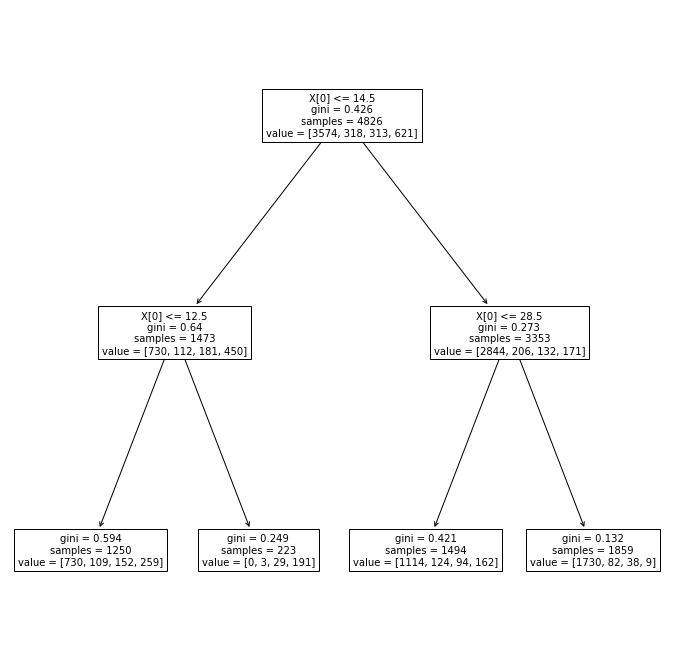

In [7]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(tree_clf, fontsize=10)
plt.show()

In [8]:
y_pred = tree_clf.predict(X_test)
all(y_pred == 0)

False

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7625854568054692

In [29]:
# Performing a 10-fold cross-validation
kf = KFold(n_splits = 10)
KFtree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
X = walmart_3[["Store", "Holiday_Flag", "Fuel_Price"]]
acc_store = []

for train_index, test_index in kf.split(X):
    print("%s %s" %(train_index, test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    KFtree_clf.fit(X_train, y_train)
    y_KFpred = KFtree_clf.predict(X_test)
    KFold_acc = accuracy_score(y_test, y_KFpred)
    acc_store.append(KFold_acc)

print(acc_store)
meanAcc = np.mean(acc_store)
print(meanAcc)

[ 644  645  646 ... 6432 6433 6434] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23